# MNIST Dataset using TensorFlow
### Setup

# Run this notebook in Google Colab!

## If you dare to try to set this up on your local machine (macbook) run the following commands in your terminal. Proceed at your own risk!
- conda install -c apple tensorflow-deps
- python -m pip install tensorflow-macos
- pip install tensorflow-datasets
- NOTE: DO NOT INSTALL THIS ON M1 MAC! As of Jan 17 2023 "python -m pip install tensorflow-metal" will not work for M1 Mac GPU Acceleration. Due to this the model will be trained on the CPU. DO NOT INSTALL THIS ON M1 MAC!

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Check if we are running off a GPU, if not we can change the runtime in the "Runtime" tab up top
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
!nvidia-smi

Tue May 23 17:02:03 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P8     9W /  70W |      3MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [4]:
#Loading the dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
# For the most part you will be working with tensors instead of arrays/matrcies.
# Lets take a look at what a tensor is by making one.

scaler = tf.constant(1)

In [7]:
scaler.shape

TensorShape([])

In [8]:
scaler.ndim

0

In [9]:
vector = tf.constant([1,2,3])

In [10]:
vector.shape

TensorShape([3])

In [11]:
vector.ndim

1

In [12]:
matrix = tf.constant([[1,2,3],
                     [4,5,6],
                     [7,8,9]])

In [13]:
matrix.shape

TensorShape([3, 3])

In [14]:
matrix.ndim

2

In [15]:
tensor = tf.ones(shape=(2,3,4))

In [16]:
tensor

<tf.Tensor: shape=(2, 3, 4), dtype=float32, numpy=
array([[[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]],

       [[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]]], dtype=float32)>

In [17]:
tensor.shape

TensorShape([2, 3, 4])

In [18]:
tensor.ndim

3

In [19]:
type(X_train)

numpy.ndarray

In [20]:
# It is good practice to always convert data over to tensors as it provides us extra functionality 
# the same way a numpy array adds extra functionality to a list. Only do this with you features, not target.
X_train = tf.constant(X_train)

X_test = tf.constant(X_test)

In [21]:
X_train.ndim

3

In [22]:
#peak at the data
#each index is one observation(image) represented in a multi-dimensional tensor
X_train[0]

<tf.Tensor: shape=(28, 28), dtype=uint8, numpy=
array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 2

In [23]:
#each individual array is one numpy array representing one row of pixels
X_train[0][0]

<tf.Tensor: shape=(28,), dtype=uint8, numpy=
array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=uint8)>

In [24]:
y_train[0]

5

In [25]:
#how our data is split
print("Train Feature Matrix:", X_train.shape)
print("Test Feature Matrix:", X_test.shape)
print("Train Target Matrix:", y_train.shape)
print("Test Target Matrix:", y_test.shape)

Train Feature Matrix: (60000, 28, 28)
Test Feature Matrix: (10000, 28, 28)
Train Target Matrix: (60000,)
Test Target Matrix: (10000,)


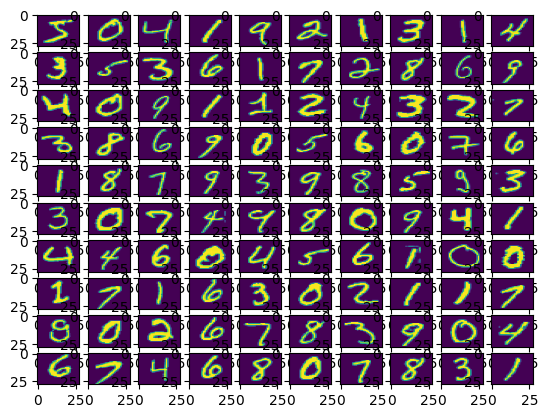

In [26]:
#a look at some observations
fig, ax = plt.subplots(10, 10)
k = 0
for i in range(10):
    for j in range(10):
        ax[i][j].imshow(X_train[k], aspect='auto')
        k += 1
plt.show()

In [27]:
#defining our model
#sequential = feed forward network
model = tf.keras.Sequential([
    
    # reshape 28 row * 28 column data to 28*28 rows
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    
      # dense(hidden) layer 1
    tf.keras.layers.Dense(256, activation='sigmoid'),  
    
    # dense(hidden) layer 2
    tf.keras.layers.Dense(128, activation='sigmoid'), 
    
      # output layer
    tf.keras.layers.Dense(10, activation='sigmoid'),  
])

In [28]:
model

In [29]:
#we need to "compile" our model by specifying our optimizer(how it learns), 
#how to calculate our cost function(loss),
#and what our metric is
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [30]:
#we train our model like any other with a x_train and y_train
#epochs is how many times we update our weights
#batch size is how many observation to look at while preforming SGD
#we can define a validation split between our epochs to determine how well it does with out of sample data
#I am going to save our fit back to a variable for later use
history = model.fit(X_train, y_train, epochs=100, 
          batch_size=2000, 
          validation_split=0.2)

Epoch 1/100
24/24 [==============================] - 6s 19ms/step - loss: 1.6880 - accuracy: 0.5966 - val_loss: 1.0838 - val_accuracy: 0.8163
Epoch 2/100
24/24 [==============================] - 0s 8ms/step - loss: 0.8397 - accuracy: 0.8315 - val_loss: 0.5944 - val_accuracy: 0.8803
Epoch 3/100
24/24 [==============================] - 0s 9ms/step - loss: 0.5182 - accuracy: 0.8867 - val_loss: 0.4119 - val_accuracy: 0.9065
Epoch 4/100
24/24 [==============================] - 0s 8ms/step - loss: 0.3856 - accuracy: 0.9080 - val_loss: 0.3338 - val_accuracy: 0.9179
Epoch 5/100
24/24 [==============================] - 0s 7ms/step - loss: 0.3217 - accuracy: 0.9186 - val_loss: 0.2906 - val_accuracy: 0.9253
Epoch 6/100
24/24 [==============================] - 0s 9ms/step - loss: 0.2812 - accuracy: 0.9269 - val_loss: 0.2611 - val_accuracy: 0.9316
Epoch 7/100
24/24 [==============================] - 0s 8ms/step - loss: 0.2530 - accuracy: 0.9317 - val_loss: 0.2428 - val_accuracy: 0.9326
Epoch 8/100


In [31]:
#final model score against our test data
results = model.evaluate(X_test,  y_test, verbose = 0)
print('test loss, test acc:', results)

test loss, test acc: [0.09742147475481033, 0.968999981880188]


In [32]:
predictions = model.predict(tf.expand_dims(X_train[0], axis=0))

1/1 [==============================] - 0s 81ms/step


In [33]:
predictions

array([[0.00136391, 0.10395385, 0.00825092, 0.99114555, 0.00262601,
        0.99996173, 0.00234214, 0.0345061 , 0.03833614, 0.38700995]],
      dtype=float32)

In [34]:
# We can see what prediction the model made using np.argmax on our predictions array
np.argmax(predictions)

5

In [35]:
# Our actual
y_train[0]

5

In [36]:
history_df = pd.DataFrame(history.history)

In [37]:
history_df.head()

,loss,accuracy,val_loss,val_accuracy
0,1.688023,0.596646,1.083802,0.816333
1,0.839652,0.831542,0.594416,0.880333
2,0.518183,0.886750,0.411852,0.906500
3,0.385599,0.908000,0.333751,0.917917
4,0.321674,0.918583,0.290555,0.925333


Text(0, 0.5, 'Accuracy')

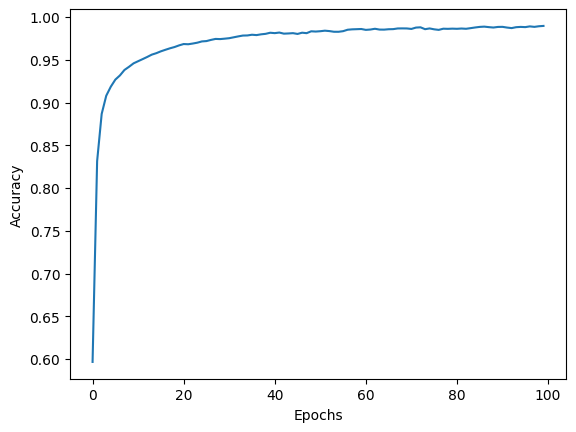

In [38]:
# It looks like our model is reaching the point of diminshing returns with epochs. Let's take a look
history_df.accuracy.plot()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Loss')

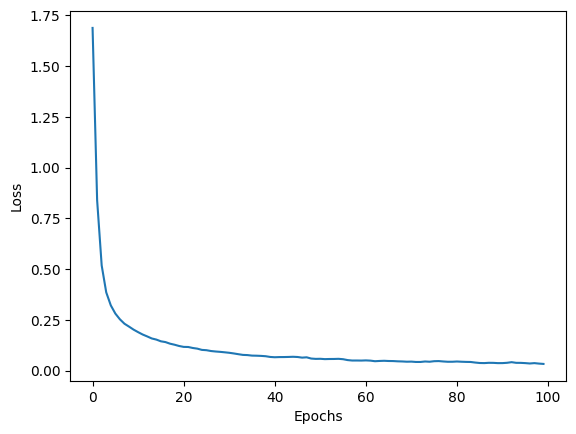

In [39]:
history_df.loss.plot()
plt.xlabel('Epochs')
plt.ylabel('Loss')

In [40]:
# How can we stop it early if we don't need to contuniue training
#defining our model
#sequential = feed forward network
model2 = tf.keras.Sequential([
    
    # reshape 28 row * 28 column data to 28*28 rows
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    
      # dense(hidden) layer 1
    tf.keras.layers.Dense(256, activation='sigmoid'),  
    
    # dense(hidden) layer 2
    tf.keras.layers.Dense(128, activation='sigmoid'), 
    
      # output layer
    tf.keras.layers.Dense(10, activation='sigmoid'),  
])

model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

history2 = model2.fit(X_train, y_train, epochs=100, 
          batch_size=2000, 
          validation_split=0.2,
          callbacks = [callback])

Epoch 1/100
24/24 [==============================] - 1s 12ms/step - loss: 1.6413 - accuracy: 0.6253 - val_loss: 1.0301 - val_accuracy: 0.8303
Epoch 2/100
24/24 [==============================] - 0s 6ms/step - loss: 0.7804 - accuracy: 0.8502 - val_loss: 0.5427 - val_accuracy: 0.8901
Epoch 3/100
24/24 [==============================] - 0s 5ms/step - loss: 0.4798 - accuracy: 0.8931 - val_loss: 0.3865 - val_accuracy: 0.9078
Epoch 4/100
24/24 [==============================] - 0s 6ms/step - loss: 0.3652 - accuracy: 0.9104 - val_loss: 0.3190 - val_accuracy: 0.9180
Epoch 5/100
24/24 [==============================] - 0s 6ms/step - loss: 0.3094 - accuracy: 0.9201 - val_loss: 0.2808 - val_accuracy: 0.9269
Epoch 6/100
24/24 [==============================] - 0s 6ms/step - loss: 0.2722 - accuracy: 0.9280 - val_loss: 0.2548 - val_accuracy: 0.9307
Epoch 7/100
24/24 [==============================] - 0s 5ms/step - loss: 0.2459 - accuracy: 0.9334 - val_loss: 0.2359 - val_accuracy: 0.9367
Epoch 8/100


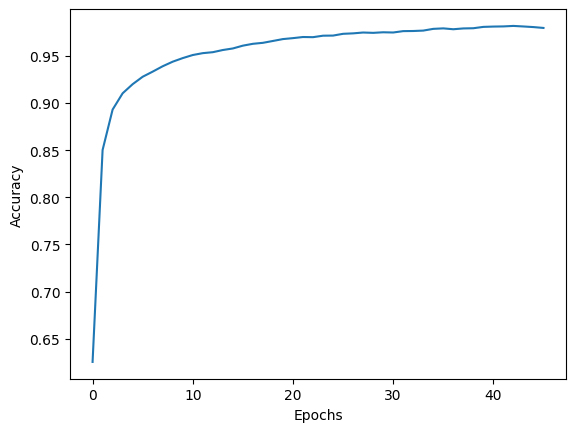

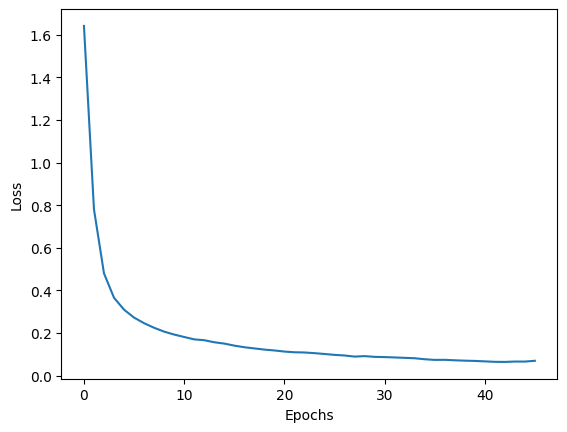

In [41]:
# stopped early!, Let's replot
history_df2 = pd.DataFrame(history2.history)

history_df2.accuracy.plot()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

history_df2.loss.plot()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [42]:
# Once we are happy we can save our model for later
model2.save('bestmodel')

In [43]:
# We can also load it up to use for predictions
new_model = tf.keras.models.load_model('bestmodel')

In [44]:
new_model

In [45]:
new_model.predict(tf.expand_dims(X_train[0], axis=0))

1/1 [==============================] - 0s 55ms/step


array([[0.11214998, 0.3525113 , 0.03219663, 0.977491  , 0.02326918,
        0.99994123, 0.08697268, 0.5109039 , 0.138096  , 0.37898445]],
      dtype=float32)

In [46]:
y_train[0]

5